# Visualizing Collatz conjecture

The starting value having the largest total stopping time while being

    less than 10 is 9, which has 19 steps,
    less than 100 is 97, which has 118 steps,
    less than 1000 is 871, which has 178 steps,
    less than 10^4 is 6171, which has 261 steps,
    less than 10^5 is 77031, which has 350 steps,
    less than 10^6 is 837799, which has 524 steps,
    less than 10^7 is 8400511, which has 685 steps,
    less than 10^8 is 63728127, which has 949 steps,
    less than 10^9 is 670617279, which has 986 steps,
    less than 10^10 is 9780657630, which has 1132 steps,[10]
    less than 10^11 is 75128138247, which has 1228 steps,
    less than 10^12 is 989345275647, which has 1348 steps.

In [1]:
import numpy as np
import pylab as plt

In [2]:
%%time

# We will generate Collatz chains from these starting numbers
np.random.seed(42)
starts = np.random.choice(1_000_000, 5000, replace=False)

# starts = np.round(np.random.random_sample(8) * 1_000_000_000_000).astype(int)

# Manually adding some special numbers
starts[:2] = [1024 * 512, 837799]

# starts[:8] = [1024 * 512, 837799, 8400511, 63728127, 670617279, 9780657630, 75128138247, 989345275647]

chain = np.zeros((10_000, 3)).astype(int)
counter = 0

# Loop over starting numbers
for num, start in enumerate(starts):
    print(".", end="", flush=True)
    if (num + 1) % 100 == 0:
        print("", flush=True)

    # Collatz iterations
    position = start
    while position > 1:
        if position % 2 == 0:
            position_new = position / 2
        else:
            position_new = position * 3 + 1

        # Check if we already had this transition before
        ind = (chain[:, 0] == position_new) & (chain[:, 1] == position)
        if np.sum(ind) == 0:
            # If not, add it with counter 1
            chain[counter] = [position_new, position, 1]
            counter += 1

            # If needed, increase the buffer
            if counter >= len(chain):
                chain = np.concatenate((chain, np.zeros((10_000, 3)).astype(int)))
        else:
            # If yes, increase the counter
            chain[ind, 2] += 1
        position = position_new

chain = chain[:counter]
ind = np.argsort(chain[:, 0])
chain = chain[ind]

print("")
print("Tree size: ", chain.shape)
print("")
print("First 10 edges:")
print(chain[:10])

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...........................................................................................

CPU times: user 3min 56s, sys: 2.8 s, total: 3min 59s
Wall time: 3min 59s


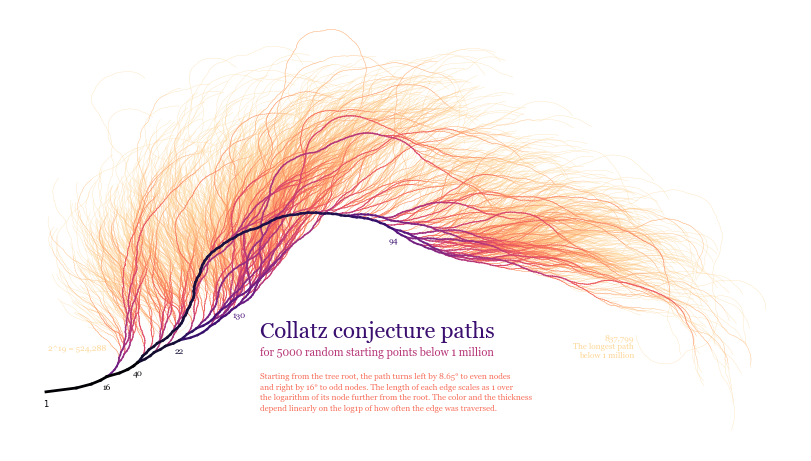

In [3]:
%%time

plt.figure(figsize=(8, 4.5), layout="constrained")

chain_ext = np.zeros((chain.shape[0], 6)).astype(float)
chain_ext[:, :3] = chain


def draw(start, pos_beg, angle):
    ind = chain[:, 0] == start
    if np.sum(ind) == 0:
        return
    # if start > 10_000:
        # return
    else:
        for i, link in enumerate(chain[ind]):
            if link[1] % 2 == 0:
                new_angle = angle + np.deg2rad(8.65)  # .15
            else:
                new_angle = angle - np.deg2rad(16)  # .28

            pos_end = pos_beg + [np.cos(new_angle), np.sin(new_angle)] / np.log(link[1])
            col = np.log1p(link[2]) / np.log1p(np.max(chain[:, 2]))
            plt.plot(
                [pos_beg[0], pos_end[0]],
                [pos_beg[1], pos_end[1]],
                lw=2 * col,
                c=plt.cm.magma(1 - col),
                zorder=col,
            )

            chain_ext[np.where(ind)[0][i], 3:] = [
                pos_end[0],
                pos_end[1],
                np.log1p(link[2]) / np.log1p(np.max(chain[:, 2])),
            ]

            # Recursion
            draw(link[1], pos_end, new_angle)


draw(1, np.array([0, 0]), 0)

for num, label in zip(
    [1024 * 512, 837799], 
    [f"2^19 = {1024 * 512:,}", "837,799\nThe longest path\nbelow 1 million"]
):
    pos = chain_ext[chain[:, 1] == num][0][3:]
    plt.text(
        pos[0] - 0.1,
        pos[1] + 0.1,
        f"{label}",
        fontsize=6,
        fontname="Georgia",
        ha="right",
        va="top",
        color=plt.cm.magma(1 - pos[2]),
    )

for num in [16, 40, 22, 130, 94]:
    pos = chain_ext[chain[:, 1] == num][0][3:]
    plt.text(
        pos[0],
        pos[1] - 0.4,
        num,
        fontsize=6,
        fontname="Georgia",
        ha="center",
        va="top",
        color=plt.cm.magma(1 - pos[2]),
    )

plt.text(0, -0.4, 1, fontsize=6, ha="center", va="top", color=plt.cm.magma(0))

plt.text(
    10,
    3,
    "Collatz conjecture paths",
    fontname="Georgia",
    fontsize=16,
    color=plt.cm.magma(0.2),
)
plt.text(
    10,
    2,
    "for 5000 random starting points below 1 million",
    fontname="Georgia",
    fontsize=8,
    color=plt.cm.magma(0.5),
)
plt.text(
    10,
    -1,
    """Starting from the tree root, the path turns left by 8.65° to even nodes
and right by 16° to odd nodes. The length of each edge scales as 1 over
the logarithm of its node further from the root. The color and the thickness
depend linearly on the log1p of how often the edge was traversed.""",
    fontname="Georgia",
    fontsize=6,
    linespacing=1.4,
    color=plt.cm.magma(0.7),
)

plt.axis("off")
plt.savefig("collatz-1mln-5000.png", dpi=300, facecolor="w")